#### Purpose
- To classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
- Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet-van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
- The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

#### The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [497]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics

In [498]:
vehicle_df = pd.read_csv('vehicle.csv')

In [499]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [500]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [501]:
print("1. There seems to be lots of missing values in various columns")
print("2. Also, no column is of type object except target column. It means there are non-numeric data in these columns")

1. There seems to be lots of missing values in various columns
2. Also, no column is of type object except target column. It means there are non-numeric data in these columns


### Data Preprocessing

In [502]:
#Checking for missing values
columns_with_missing_values = vehicle_df.columns[vehicle_df.isna().any()]
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [503]:
print("We can see below columns has missing values:")
print(columns_with_missing_values)
print()
print("There are around 846 entries and below 2% are missing. So, \
we can drop some of the entries or replace them with a suitable value.")

We can see below columns has missing values:
Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

There are around 846 entries and below 2% are missing. So, we can drop some of the entries or replace them with a suitable value.


In [504]:
#Treating missing values (Replacing missing values with median)
for column in columns_with_missing_values:
    vehicle_df[column] = pd.to_numeric(vehicle_df[column].fillna(vehicle_df[column].median()))

In [505]:
#Check data types and missing values
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [506]:
#Checking for missing values again
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [507]:
print("We can see that all missing values have been replacee successfully with its median")

We can see that all missing values have been replacee successfully with its median


### Statistical Analysis

In [508]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [509]:
print("Few columns seems to have some skewness i.e data is not normalized")

Few columns seems to have some skewness i.e data is not normalized


In [510]:
#Checking skewness
vehicle_df.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

In [511]:
print("We can see that some columns are highly skewed. It means they have lots of inormation on the tails")
print("e.g. 'max.length_aspect_ratio', 'pr.axis_aspect_ratio' and 'scaled_radius_of_gyration.1'")

We can see that some columns are highly skewed. It means they have lots of inormation on the tails
e.g. 'max.length_aspect_ratio', 'pr.axis_aspect_ratio' and 'scaled_radius_of_gyration.1'


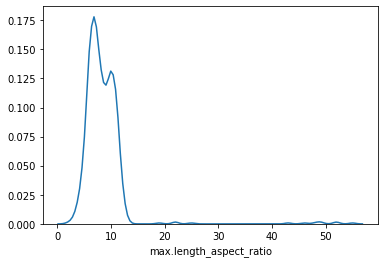

In [512]:
sns.distplot(vehicle_df['max.length_aspect_ratio'], hist=False)

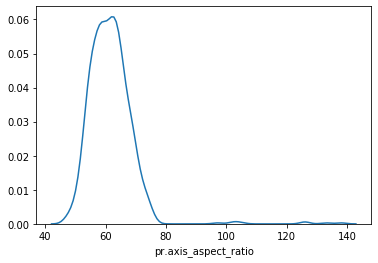

In [513]:
sns.distplot(vehicle_df['pr.axis_aspect_ratio'], hist=False)

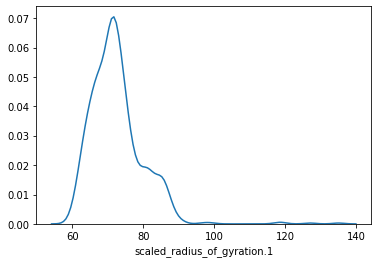

In [514]:
sns.distplot(vehicle_df['scaled_radius_of_gyration.1'], hist=False)

In [515]:
#Scaling the Data
scalar = StandardScaler()
X = vehicle_df.drop('class', axis=1)
vehicle_df_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
vehicle_df_scaled['class'] = vehicle_df['class']

In [516]:
vehicle_df_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957,van
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977,van
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447,car
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056,van
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181,bus


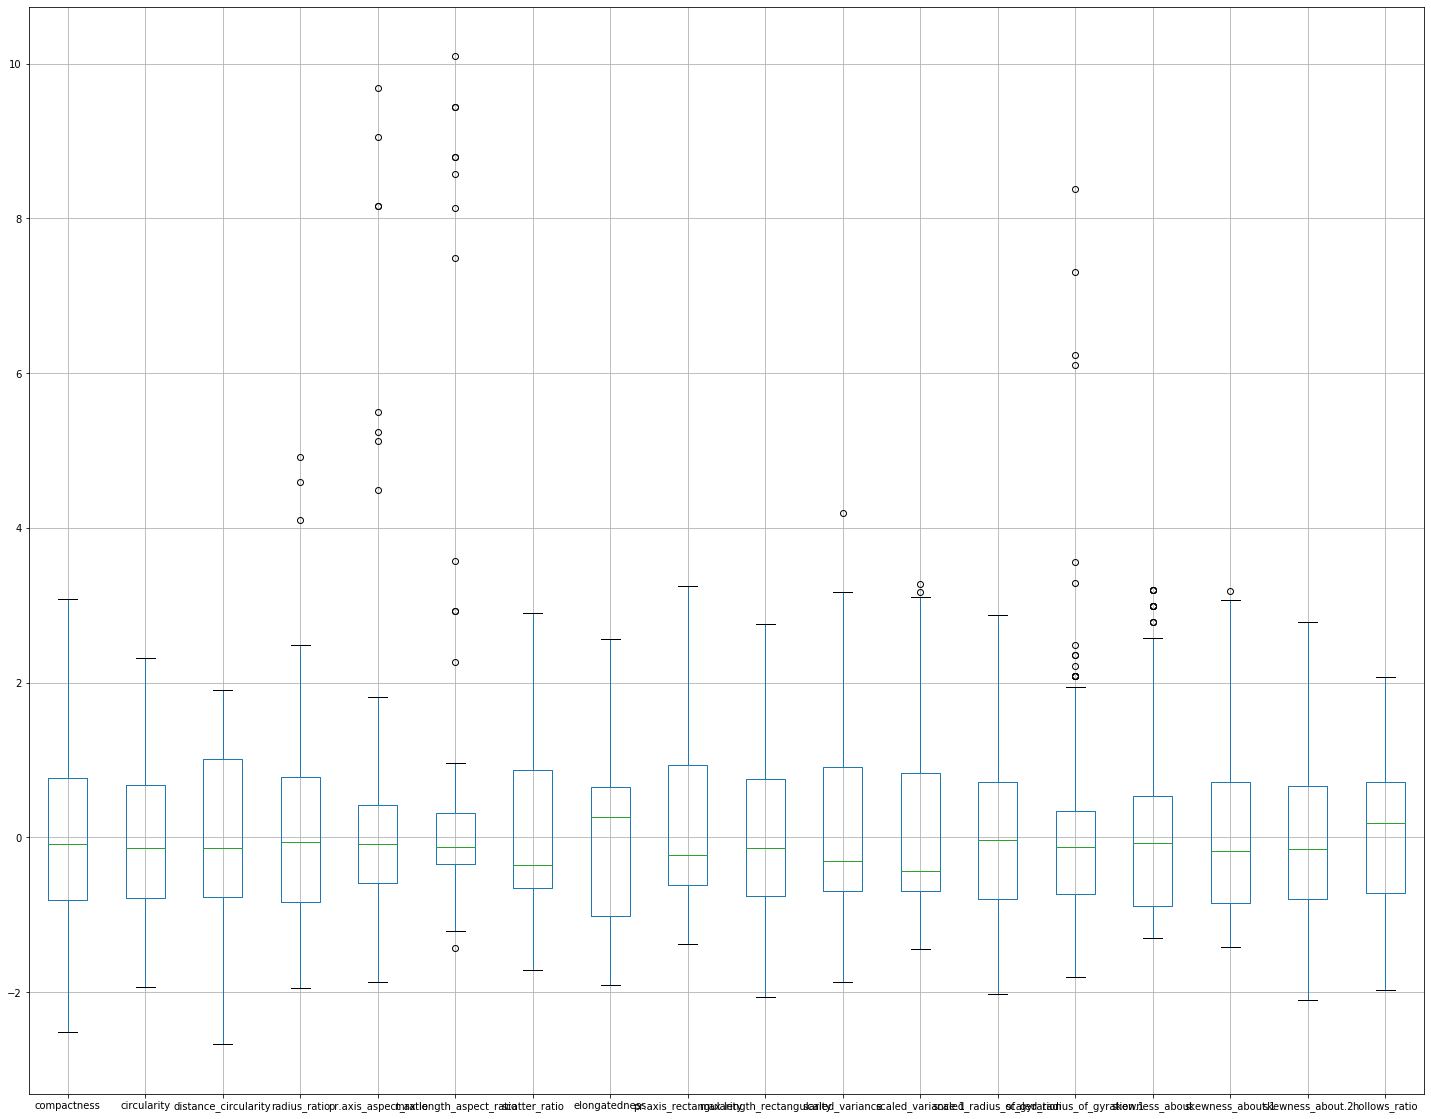

In [517]:
#Checking for Outliers
vehicle_df_scaled.boxplot(figsize=(25,20))

In [518]:
print("We can see that lots of columns have outliers")

We can see that lots of columns have outliers


In [519]:
#Identifying columns with outlier
list_count_outlier_above = list()
list_count_outlier_below = list()
list_column = list()
def identifyAndTreatOutliers(column, data):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 -Q1
    above = Q3 + 1.5*IQR
    below = Q1 - 1.5*IQR
    
    count_outlier_above = data.loc[data > above].count()
    count_outlier_below = data.loc[data < below].count()
    if (count_outlier_above == 0 & count_outlier_below == 0) :
        return 0
    else :
        list_count_outlier_above.append(count_outlier_above)
        list_count_outlier_below.append(count_outlier_below)
        list_column.append(column)
        # Treat Ouliers
        data.loc[data > above] = data.median()
        data.loc[data < below] = data.median()

In [520]:
for column in X.columns:
    identifyAndTreatOutliers(column, vehicle_df_scaled[column])
# Outlier DataFrame
outlier_df = pd.DataFrame()
outlier_df['Column'] = list_column
outlier_df['Count_outlier_above'] = list_count_outlier_above
outlier_df['Count_outlier_below'] = list_count_outlier_below

d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [521]:
outlier_df

,Column,Count_outlier_above,Count_outlier_below
0,radius_ratio,3,0
1,pr.axis_aspect_ratio,8,0
2,max.length_aspect_ratio,12,1
3,scaled_variance,1,0
4,scaled_variance.1,2,0
5,scaled_radius_of_gyration.1,15,0
6,skewness_about,12,0
7,skewness_about.1,1,0


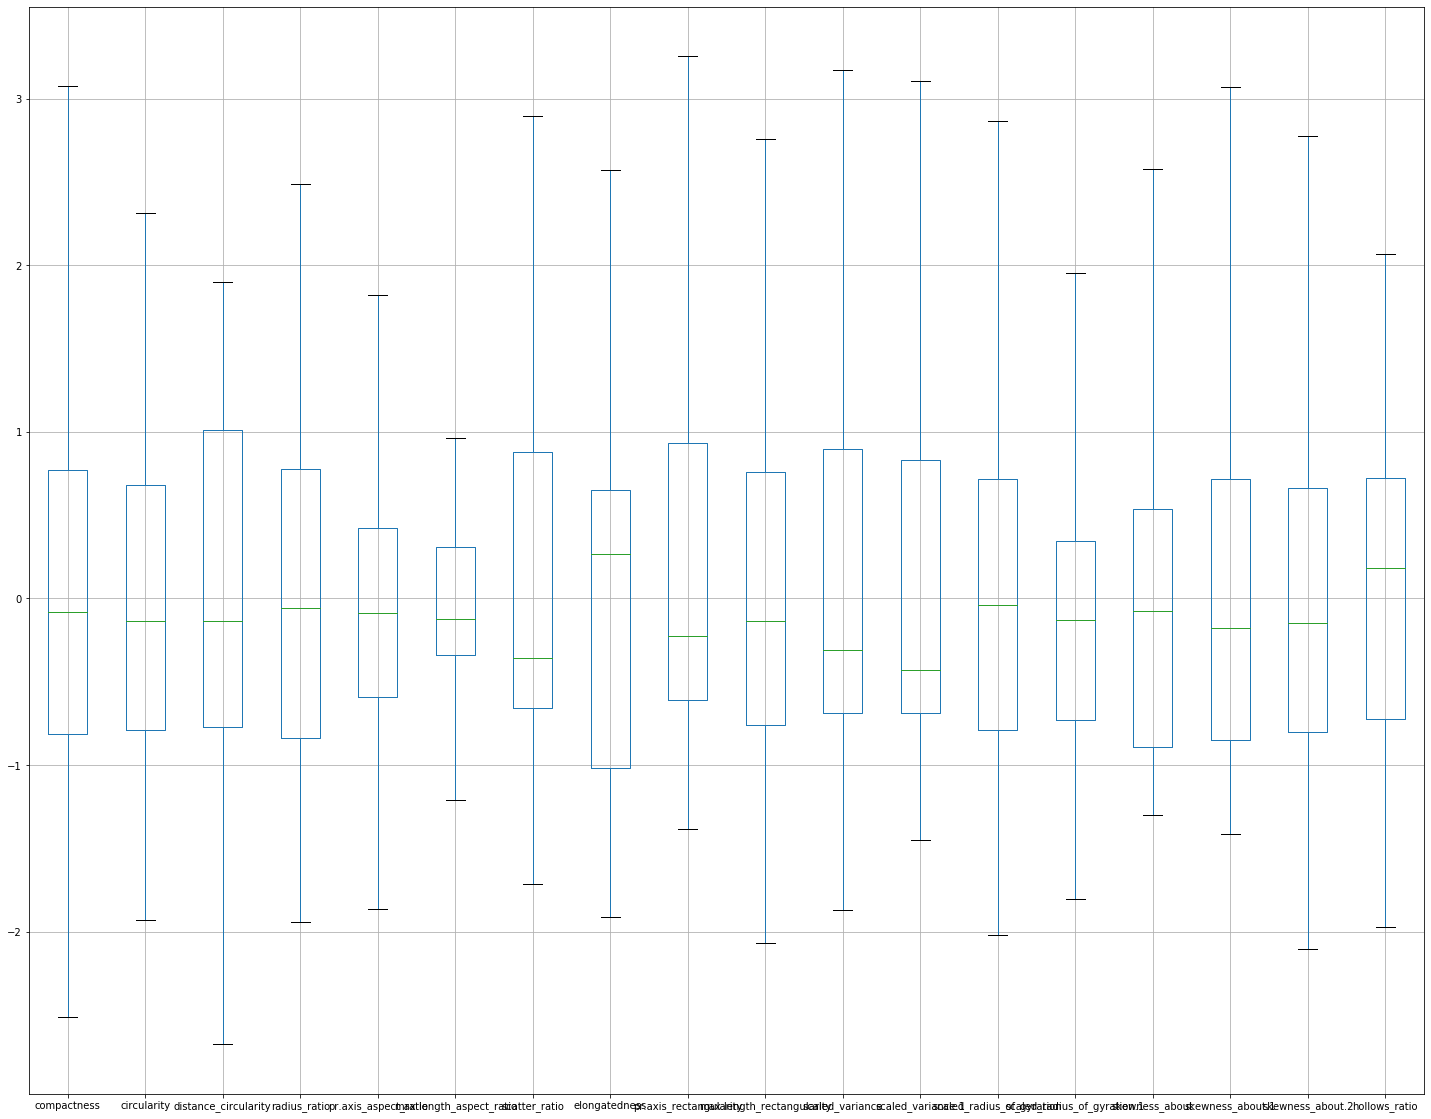

In [522]:
#Checking again Outliers using boxplot
vehicle_df_scaled.boxplot(figsize=(25,20))

In [523]:
print("We can see that Ouliers have been habndled now and data is well spread now")

We can see that Ouliers have been habndled now and data is well spread now


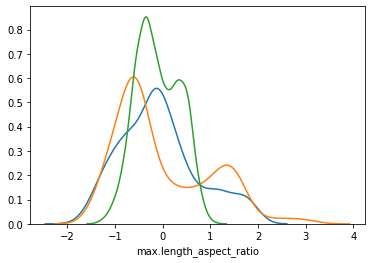

In [524]:
sns.distplot(vehicle_df_scaled['scaled_radius_of_gyration.1'], hist=False)
sns.distplot(vehicle_df_scaled['scaled_variance.1'], hist=False)
sns.distplot(vehicle_df_scaled['max.length_aspect_ratio'], hist=False)

In [525]:
#Checking Skewness again
vehicle_df_scaled.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.118680
pr.axis_aspect_ratio           0.161223
max.length_aspect_ratio        0.090367
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.602557
scaled_variance.1              0.820685
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    0.535057
skewness_about                 0.624590
skewness_about.1               0.674715
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

In [526]:
print("We can see that is now data is more normalized and less skewed")

We can see that is now data is more normalized and less skewed


### Understanding Attributes

In [527]:
corr = vehicle_df_scaled.corr()
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770


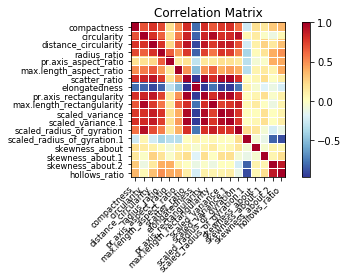

In [528]:
#Checking Mulit-Colinearity
import statsmodels.graphics.api as smg
smg.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [529]:
print("We can see that there are high correlation between different columns")
print("We have to drop some of the highly related columns")

We can see that there are high correlation between different columns
We have to drop some of the highly related columns


Let's visualize relationship between one or two columns


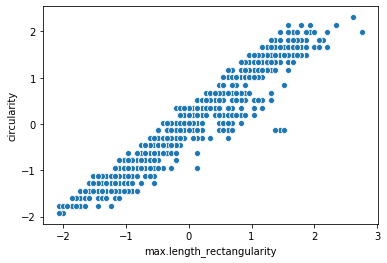

In [530]:
print("Let's visualize relationship between one or two columns")
sns.scatterplot(vehicle_df_scaled['max.length_rectangularity'], vehicle_df_scaled['circularity'])

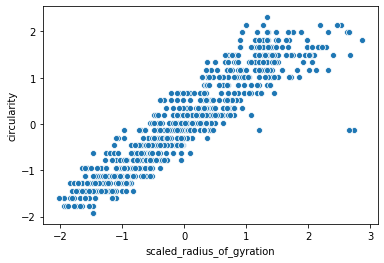

In [531]:
sns.scatterplot(vehicle_df_scaled['scaled_radius_of_gyration'], vehicle_df_scaled['circularity'])

In [532]:
print("We can see that column 'circularity' has some high correleation \
with other columns and this feature may not add value to the information.")
print()
print("We have to drop some features which are not adding much variance to our model  may be using PCA")

We can see that column 'circularity' has some high correleation with other columns and this feature may not add value to the information.

We have to drop some features which are not adding much variance to our model  may be using PCA


### Dimension Reduction

In [533]:
X = vehicle_df_scaled.drop('class', axis=1)
Y = vehicle_df_scaled[['class']]

pca_explained_variance = np.cumsum(pca.explained_variance_ratio_)

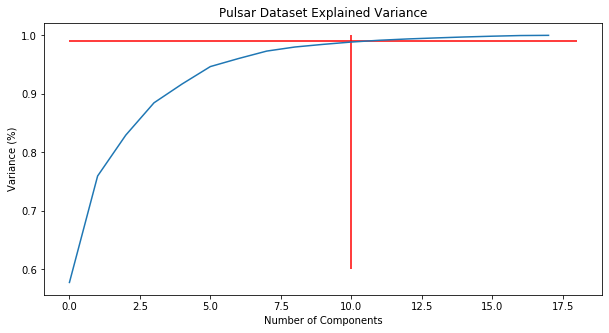

In [534]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10 , 5))
plt.plot(pca_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.vlines(10, 0.6, 1, colors='r')
plt.hlines(0.99, 0 , 18, colors='r')
plt.show()

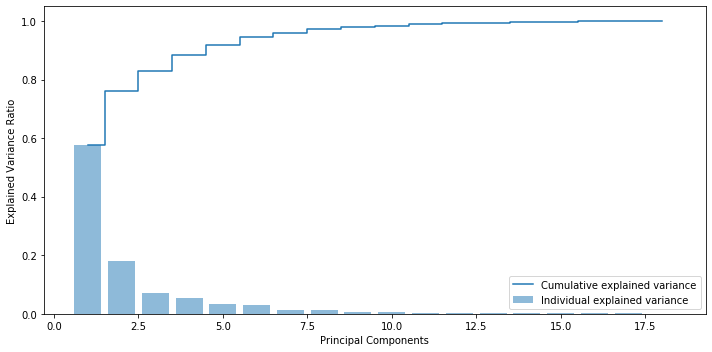

In [535]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, len(pca_explained_variance) + 1), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, len(pca_explained_variance) + 1), pca_explained_variance, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [536]:
pca_explained_variance

array([0.57773347, 0.75965739, 0.82954356, 0.88471373, 0.91696281,
       0.94664622, 0.96039395, 0.97311241, 0.98008673, 0.98459337,
       0.98856437, 0.99161721, 0.99385292, 0.99559602, 0.99720736,
       0.99855852, 0.99968044, 1.        ])

In [537]:
pca.components_.shape

(18, 18)

In [538]:
print("We can see that top 10 features are covering more than 95% of variance.")
print("We can drop remaining features")

We can see that top 10 features are covering more than 95% of variance.
We can drop remaining features


In [539]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca.shape

(846, 10)

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, random_state=7, test_size=0.3)

In [541]:
#Build Model using SVM and HyperParameter Tuning using grid search
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)

d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [542]:
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9724409448818898
Confusion Matrix:
 [[ 65   0   1]
 [  1 123   1]
 [  0   4  59]]


In [543]:
#Checking Score Using CV Score and KFold
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model1, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\mode

[0.92941176 0.96470588 0.95294118 0.97647059 0.95294118 0.96470588
 0.97619048 0.94047619 0.95238095 0.96428571]
Accuracy: 95.745% (1.416%)


d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


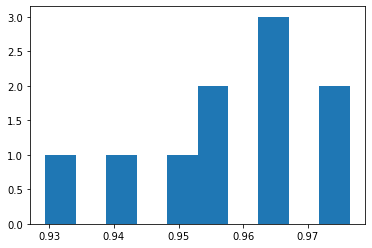

In [544]:
# plot scores
plt.hist(results)
plt.show()